# Выявление закономерностей, определяющих успешность игры

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы на конец 2016 год. Необходимо выявить закономерности, определяющие успешность игры, и спланировать рекламную компанию на 2017 год.

## Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


In [5]:
data = pd.read_csv('./games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [9]:
for i in data.columns:
    print(data[i].value_counts().sort_values())

Nihon Pro Mahjong Kishikai Kanshuu: Pro Ni Naru Mahjong DS     1
Fade to Black                                                  1
MXRider                                                        1
Disney Magic World 2                                           1
Sengoku Musou 3 Z                                              1
                                                              ..
Madden NFL 07                                                  9
FIFA 14                                                        9
LEGO Marvel Super Heroes                                       9
Ratatouille                                                    9
Need for Speed: Most Wanted                                   12
Name: Name, Length: 11559, dtype: int64
PCFX       1
GG         1
TG16       2
3DO        3
WS         6
SCD        6
NG        12
GEN       29
DC        52
GB        98
NES       98
2600     133
WiiU     147
SAT      173
SNES     239
XOne     247
N64      319
PS4      392
PSV      43

1. Названия столбцов необходимо изменить - привести к общему виду и убрать заглавные буквы
2. Перевести данные в столбце Year_of_Release релиза в int - для уменьшения места
3. Перевести данные в столбце User_Score в float - т.к. значениями могут быть только цифры, для удобной работы (рассчетов) и для уменьшения использования памяти
4. Обработать пустые значения в столбцах Name, Genre, Year_of_Release, Critic_Score, User_Score, Rating:
Year_of_Release, Name, Genre - строки можно удалить, их всего 1,6% - скорее всего случайная ошибка
Critic_Score, User_Score, Rating - удалить строки нельзя, пропущенных значений слишком много, поэтому проставлю маркет -1. Пропуски в этих столбцах скорее всего связаны с тем, что данных было мало, и оценка не подсчиталась. Рейтинг возможно не проставлен
5. В столбце User_Score есть значение tbd - скорее всего это сокращение от to be done - следовательно, рейтинга на эти игры нет

## Подготовка данных

In [4]:
# приведение к единому виду названия столбцов
data.columns = map(str.lower, data.columns)

# замена tbd в User_Score на маркер
data = data.replace({'user_score':{"tbd":-1}})
print(data.query('user_score == "tbd"'))

# удаление строк
data.drop(data[data['year_of_release'].isna()].index, inplace=True)
data.drop(data[data['name'].isna()].index, inplace=True)
data.drop(data[data['genre'].isna()].index, inplace=True)

# замена пустых значений на маркер
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)
data['rating'] = data['rating'].fillna('Нет рейтинга')
data.isna().sum()

# замена типа данных
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')
data.info()

# суммарные продажи во всех регионах
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Нет рейтинга,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Нет рейтинга,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,Нет рейтинга,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,Нет рейтинга,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Нет рейтинга,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,Нет рейтинга,0.01


## Проведение исследовательского анализа данных

### Анализ по годам

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

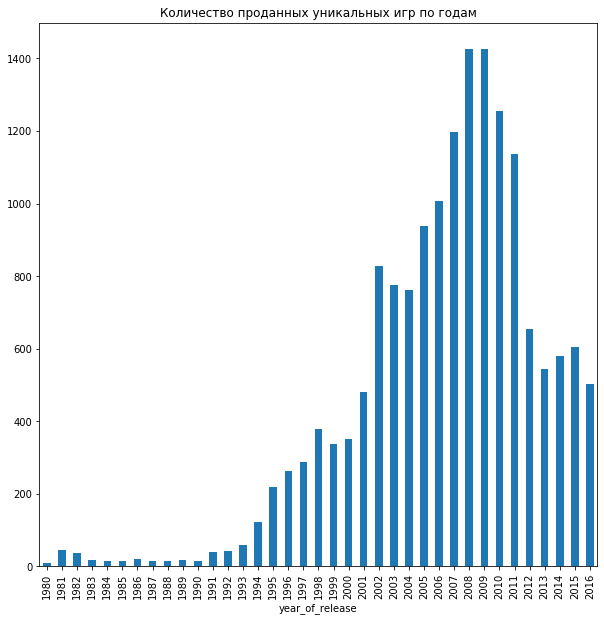

In [5]:
# количество продаж по годам
data_years = data.groupby('year_of_release')['name'].count()
data_years.plot(kind='bar', figsize=(10,10)).set_title('Количество проданных уникальных игр по годам')
data_years

С 1980 по 1993 года в год выпускалось менее 100 игр. Думаю, что анализ данные по этим годам не интересен.
Также видно, что на 2006 - 2011 гг пришелся пик продаж игр, а с 2012 года ситуация на рынке стабилизировалась.

### Анализ по платформам

platform
GG         1
PCFX       1
TG16       2
3DO        3
WS         6
SCD        6
NG        12
GEN       27
DC        52
GB        97
NES       98
2600     116
WiiU     147
SAT      173
SNES     239
XOne     247
N64      316
PS4      392
PSV      429
3DS      512
GC       542
XB       803
GBA      811
PC       957
PS      1190
PSP     1193
X360    1232
Wii     1286
PS3     1306
DS      2121
PS2     2127
Name: name, dtype: int64


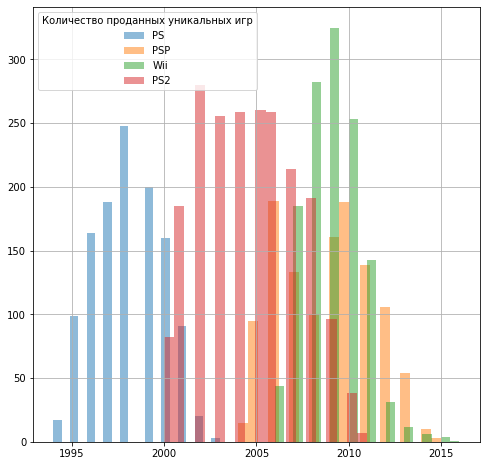

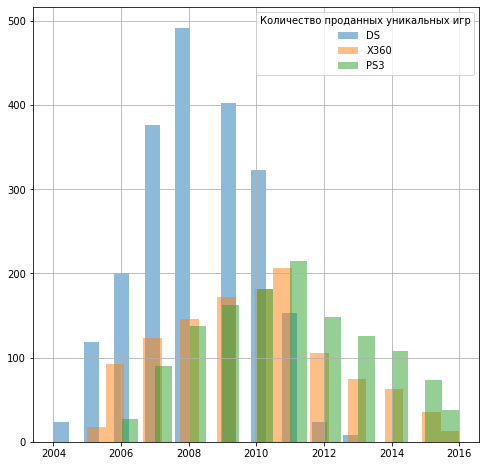

In [6]:
# выявление срока жизни платформ

data_platform = data.groupby('platform')['name'].count().sort_values()
print(data_platform)

# Беру 7 платформ, продажи количества уникальных игр которых больше 1000 шт за период с 1993 года.
platforms = ['PS', 'PSP', 'Wii', 'PS2']
platforms2 = ['DS', 'X360', 'PS3']

for i in platforms:
    data.query('platform == @i and year_of_release > 1993')['year_of_release'].hist(alpha=0.5, bins=20, label=i, figsize=(8,8)).legend().set_title('Количество проданных уникальных игр')

plt.show()

for j in platforms2:
    data.query('platform == @j and year_of_release > 1993')['year_of_release'].hist(alpha=0.5, bins=20, label=j, figsize=(8,8)).legend().set_title('Количество проданных уникальных игр')



Судя по гистограммам, в среднем платформы "живут" от 5 до 10 лет. Также выявила, что на 2006 - 2011 гг пришелся пик продаж игр, а с 2012 года ситуация на рынке стабилизировалась. Следовательно, для прогноза на 2017 год берем информацию с 2012 года.

year_of_release   2007   2008   2009   2010   2011   2012   2013   2014  \
platform                                                                  
3DS                0.0    0.0    0.0    0.0  116.0   93.0   91.0   80.0   
DC                 1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
DS               376.0  492.0  403.0  323.0  153.0   23.0    8.0    0.0   
GBA                6.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
GC                 4.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
PC                62.0   76.0  107.0   90.0  139.0   61.0   38.0   47.0   
PS2              214.0  191.0   96.0   38.0    7.0    0.0    0.0    0.0   
PS3               90.0  138.0  162.0  181.0  215.0  148.0  126.0  108.0   
PS4                0.0    0.0    0.0    0.0    0.0    0.0   16.0   75.0   
PSP              133.0  100.0  161.0  188.0  139.0  106.0   54.0   10.0   
PSV                0.0    0.0    0.0    0.0   18.0   53.0   63.0  100.0   
Wii              185.0  2

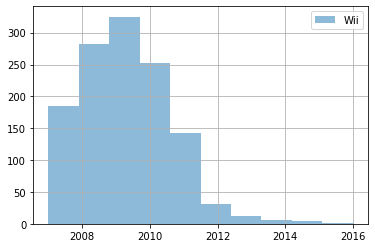

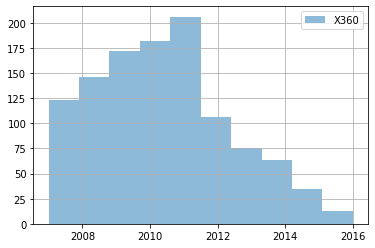

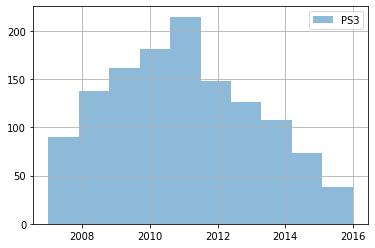

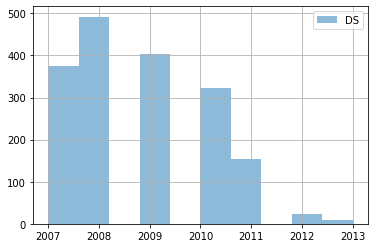

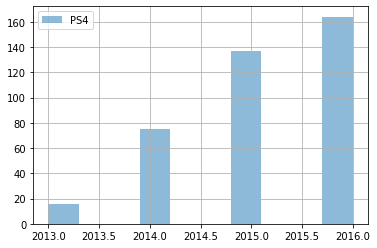

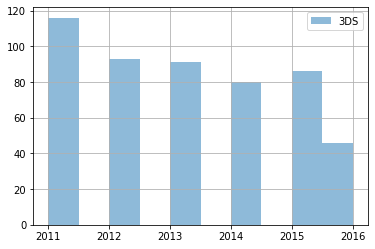

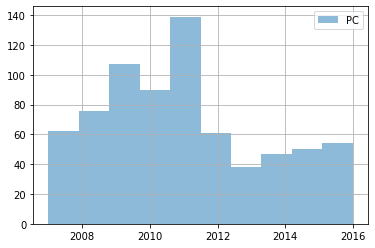

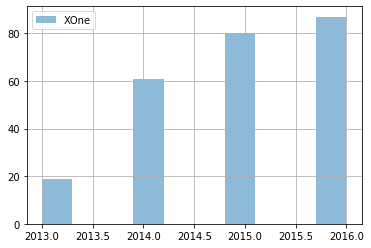

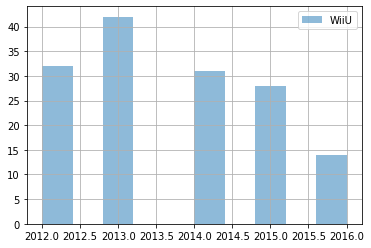

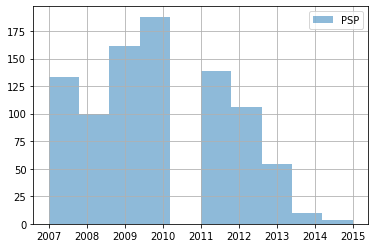

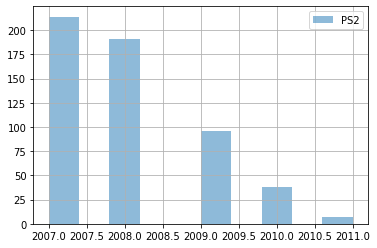

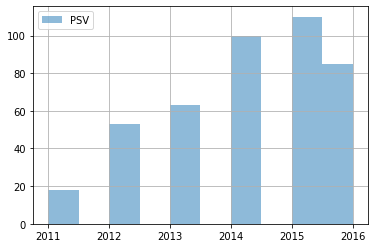

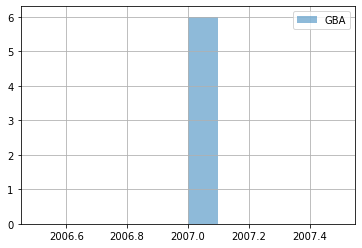

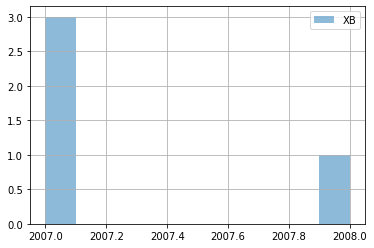

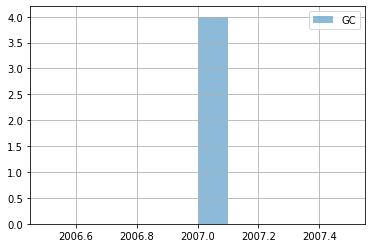

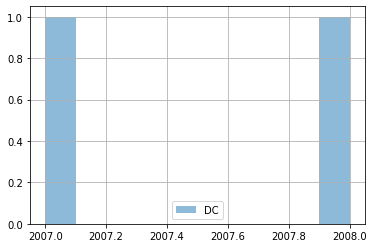

In [7]:
# определение перспективных платформ
data = data.query('year_of_release > 2006')

data_pivot = data.pivot_table(index='platform', values='name', columns='year_of_release', aggfunc=len)
data_pivot = data_pivot.fillna(0)
print(data_pivot)

all_platform = data['platform'].unique()

for i in all_platform:
    data.query('platform == @i')['year_of_release'].hist(alpha=0.5, bins=10, label=i).legend()
    plt.show()


Судя по динамике продаж, можно выявить несколько перспективных платформ: PS4, 3DS, PC, XOne, PSV

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 18)

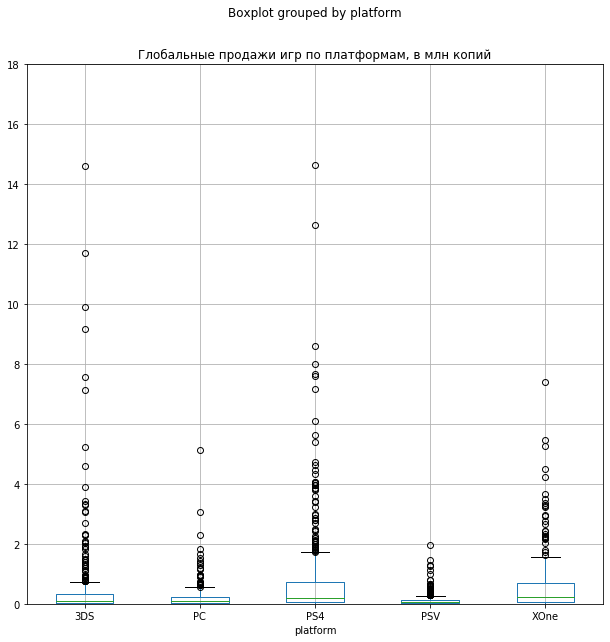

In [8]:
# глобальные продажи игр по платформам
data = data.query('year_of_release > 2011')

platforms3 = ['PS4', '3DS', 'PC', 'XOne', 'PSV']

data.query('platform in @platforms3').boxplot('total_sales', by = 'platform', figsize=(10,10)).set_title('Глобальные продажи игр по платформам, в млн копий')
plt.ylim(0, 18)

Судя по графику, на платформах 3DS и PS4 самые сильные выбросы, которые означают выпуск на этих платформах самых популярных игр. Следом идут PC и XOne. Также большие выбросы у платформ PC и XOne. А вот платформа PSV не имеет сильных выбросов (по сравнению с другими платформами), следовательно, не выпускала настолько популярные игры.

user_score: 0.20181255007655283
critic_score: 0.31055301915326294


Text(0.5, 1.0, 'Соотношение глобальных продаж и оценок критиков по остальным платформам')

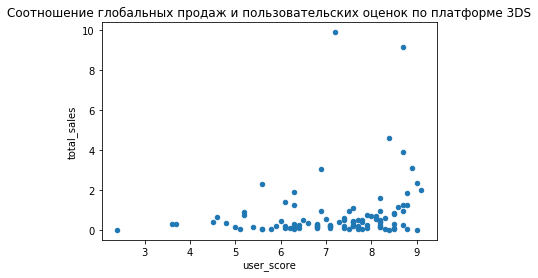

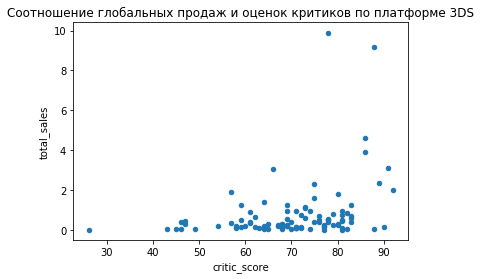

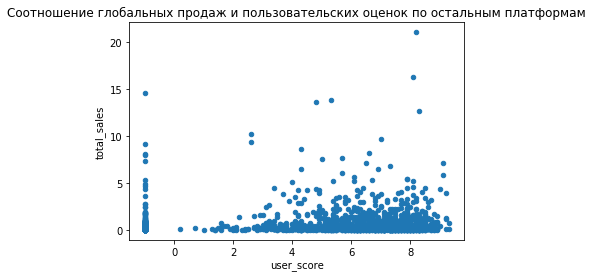

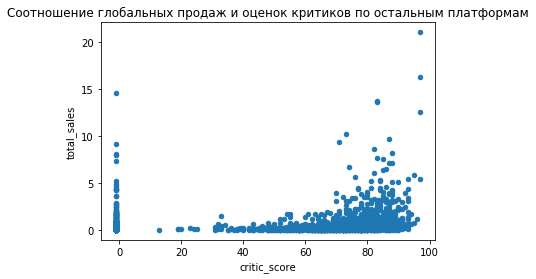

In [9]:
# Влияние отзывов пользователей и критиков на продажи

data_3DS = data.query('platform == "3DS" and user_score > 0 and critic_score > 0')

print('user_score:', data_3DS['user_score'].corr(data_3DS['total_sales']))
print('critic_score:', data_3DS['critic_score'].corr(data_3DS['total_sales']))

data_3DS.plot(kind='scatter', x='user_score', y='total_sales').set_title('Соотношение глобальных продаж и пользовательских оценок по платформе 3DS')
data_3DS.plot(kind='scatter', x='critic_score', y='total_sales').set_title('Соотношение глобальных продаж и оценок критиков по платформе 3DS')

data_not_3DS = data.query('platform != "3DS"')

data_not_3DS.plot(kind='scatter', x='user_score', y='total_sales').set_title('Соотношение глобальных продаж и пользовательских оценок по остальным платформам')
data_not_3DS.plot(kind='scatter', x='critic_score', y='total_sales').set_title('Соотношение глобальных продаж и оценок критиков по остальным платформам')


Коэффициент корреляции между отзывами и глобальными продажами низкий, однако на графиках видно, что есть зависимость продаж от оценки и критиков и пользователей. зависимость не линейная, но после определенного значения оценки продажи идут вверх (по оценке пользователей: от 7, и по оценке критиков: от 80). Причем разницы между самой популярной платформой и остальными нет.

### Анализ по жанрам

In [10]:
# Самые популярные жанры

data_genres = data.pivot_table(index='genre', values='total_sales', aggfunc=sum).sort_values(by='total_sales')
print('sum', data_genres)
print()

data_genres2 = data.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales')
print('median', data_genres2)

sum               total_sales
genre                    
Puzzle               4.89
Strategy            13.34
Adventure           29.43
Simulation          35.12
Fighting            44.49
Racing              53.50
Platform            61.00
Misc                85.04
Sports             181.07
Role-Playing       192.80
Shooter            304.73
Action             441.12

median               total_sales
genre                    
Adventure           0.030
Puzzle              0.045
Strategy            0.080
Action              0.120
Misc                0.120
Simulation          0.120
Fighting            0.130
Racing              0.140
Role-Playing        0.140
Platform            0.210
Sports              0.240
Shooter             0.440


Самый популярный жанр по общему количеству проданных копий - Action.
Однако самый популярный жанр по количеству проданных копий в расчете на единицу игры - Shooter.

### Вывод

1. Анализ по годам:
    - С 1980 по 1993 года в год выпускалось менее 100 игр. Думаю, что анализа данные по этим годам не интересны   
2. Анализ по платформам:  
    - В среднем, игры продаются на одну платформу от 5 до 10 лет, значит для прогноза на 2017 берем данные с 2007 года
    - Судя по динамике продаж, можно выявить несколько перспективных платформ: PS4, 3DS, PC, XOne, PSV
    - Судя по графику "ящик с усами", на платформах 3DS и PS4 самые сильные выбросы, которые означают выпуск на этих платформах самых популярных игр. Следом идут PC и XOne. Также большие выбросы у платформ PC и XOne. А вот платформа PSV не имеет сильных выбросов (по сравнению с другими платформами), следовательно, не выпускала настолько популярные игры.
    - Коэффициент корреляции между отзывами и глобальными продажами низкий, однако на графиках видно, что есть зависимость продаж от оценки и критиков и пользователей. зависимость не линейная, но после определенного значения оценки продажи идут вверх (по оценке пользователей: от 7, и по оценке критиков: от 80). Причем разницы между самой популярной платформой и остальными нет.
3. Анализ по жанрам
    - Самый популярный жанр по общему количеству проданных копий - Action.
    - Однако самый популярный жанр по количеству проданных копий в расчете на единицу игры - Shooter.

## Составление портрета каждого региона

### Самые популярные платформы

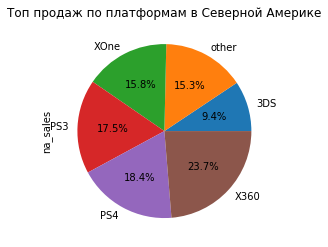

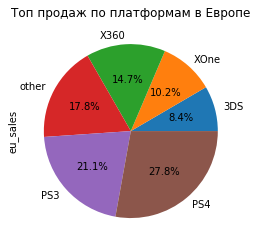

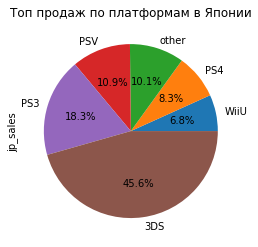

Text(0.5, 1.0, 'Сравнение долей продаж по разным регионам по платформам')

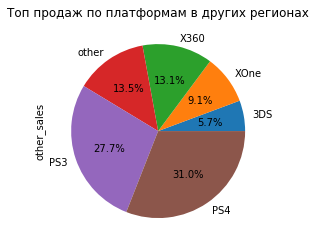

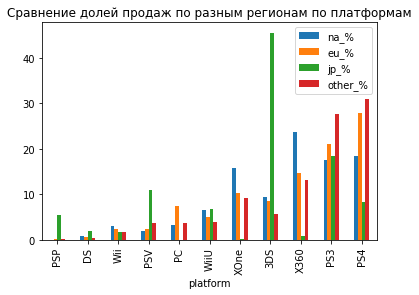

In [15]:
data_platform_na = data.pivot_table(index='platform', values='na_sales', aggfunc=sum).sort_values(by='na_sales')
data_platform_eu = data.pivot_table(index='platform', values='eu_sales', aggfunc=sum).sort_values(by='eu_sales')
data_platform_jp = data.pivot_table(index='platform', values='jp_sales', aggfunc=sum).sort_values(by='jp_sales')
data_platform_other = data.pivot_table(index='platform', values='other_sales', aggfunc=sum).sort_values(by='other_sales')

# смотрю топ 5 по каждой платформе и беру значения по кол-ву проданных копий
data_platform_na
data_platform_eu
data_platform_jp
data_platform_other

data_platform_na['other'] = np.where(data_platform_na['na_sales'] > 55, data_platform_na.index, 'other')
data_platform_eu['other'] = np.where(data_platform_eu['eu_sales'] > 42, data_platform_eu.index, 'other')
data_platform_jp['other'] = np.where(data_platform_jp['jp_sales'] > 13, data_platform_jp.index, 'other')
data_platform_other['other'] = np.where(data_platform_other['other_sales'] > 8, data_platform_other.index, 'other')

data_platform_na.groupby('other')['na_sales'].sum().sort_values().plot(kind='pie', autopct='%1.1f%%').set_title('Топ продаж по платформам в Северной Америке')
plt.show()
data_platform_eu.groupby('other')['eu_sales'].sum().sort_values().plot(kind='pie', autopct='%1.1f%%').set_title('Топ продаж по платформам в Европе')
plt.show()
data_platform_jp.groupby('other')['jp_sales'].sum().sort_values().plot(kind='pie', autopct='%1.1f%%').set_title('Топ продаж по платформам в Японии')
plt.show()
data_platform_other.groupby('other')['other_sales'].sum().sort_values().plot(kind='pie', autopct='%1.1f%%').set_title('Топ продаж по платформам в других регионах')

data_platform= data.pivot_table(index='platform', values=('na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales') , aggfunc=sum).sort_values(by='total_sales')
data_platform['na_%'] =  data_platform['na_sales'] / data_platform['na_sales'].sum() * 100
data_platform['eu_%'] =  data_platform['eu_sales'] / data_platform['eu_sales'].sum() * 100
data_platform['jp_%'] =  data_platform['jp_sales'] / data_platform['jp_sales'].sum() * 100
data_platform['other_%'] =  data_platform['other_sales'] / data_platform['other_sales'].sum() * 100

data_platform = data_platform[['na_%', 'eu_%', 'jp_%', 'other_%']]
data_platform.plot(kind='bar').set_title('Сравнение долей продаж по разным регионам по платформам')

Самые популярные платформы в Северной Америке: Х360, PS4, PS3
Самые популярные платформы в Европе: PS4, PS3, Х360
Самые популярные платформы в Японии: 3DS, PS3, PSV
Самые популярные платформы в других регионах: PS4, PS3, X360

Предпочтения в Северной Америке, Европе и других регионах не сильно отличаются (топ 3 у них одинаковый), однако самые популярные платформы в Японии отличаются от остальных.

Можно выявить платформы, популярные во всех регионах: PS4, PS3, X360

### Самые популярные жанры

<!-- Доли продаж топ 5 во всех регионах практически одинакова (нет ярко выраженного лидера) и составляет в общем около 50% - это  означает, что пользователи предпочитают разные платформы. Однако список лидеров в каждом регионе совершенно разный - что показывает различие в культурах и возможно, в рекламных компаниях, разных регионов.
 -->




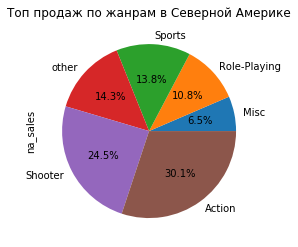

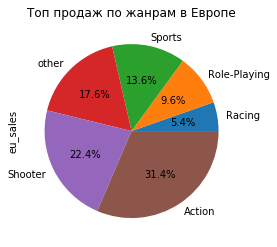

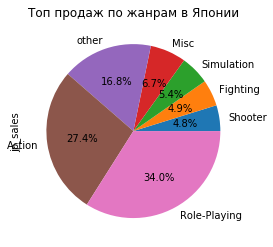

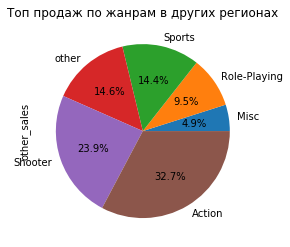

Text(0.5, 1.0, 'Сравнение долей продаж по разным регионам по жанрам')

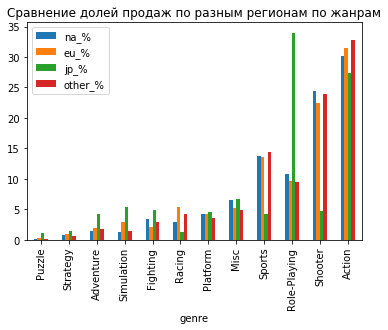

In [16]:
data_genre_na = data.pivot_table(index='genre', values='na_sales', aggfunc=sum).sort_values(by='na_sales')
data_genre_eu = data.pivot_table(index='genre', values='eu_sales', aggfunc=sum).sort_values(by='eu_sales')
data_genre_jp = data.pivot_table(index='genre', values='jp_sales', aggfunc=sum).sort_values(by='jp_sales')
data_genre_other = data.pivot_table(index='genre', values='other_sales', aggfunc=sum).sort_values(by='other_sales')

# смотрю топ 5 по каждой платформе и беру значения по кол-ву проданных копий
data_genre_na
data_genre_eu
data_genre_jp
data_genre_other

data_genre_na['other'] = np.where(data_genre_na['na_sales'] > 38, data_genre_na.index, 'other')
data_genre_eu['other'] = np.where(data_genre_eu['eu_sales'] > 27, data_genre_eu.index, 'other')
data_genre_jp['other'] = np.where(data_genre_jp['jp_sales'] > 9, data_genre_jp.index, 'other')
data_genre_other['other'] = np.where(data_genre_other['other_sales'] > 7, data_genre_other.index, 'other')

data_genre_na.groupby('other')['na_sales'].sum().sort_values().plot(kind='pie', autopct='%1.1f%%').set_title('Топ продаж по жанрам в Северной Америке')
plt.show()
data_genre_eu.groupby('other')['eu_sales'].sum().sort_values().plot(kind='pie', autopct='%1.1f%%').set_title('Топ продаж по жанрам в Европе')
plt.show()
data_genre_jp.groupby('other')['jp_sales'].sum().sort_values().plot(kind='pie', autopct='%1.1f%%').set_title('Топ продаж по жанрам в Японии')
plt.show()
data_genre_other.groupby('other')['other_sales'].sum().sort_values().plot(kind='pie', autopct='%1.1f%%').set_title('Топ продаж по жанрам в других регионах')
plt.show()

data_genre = data.pivot_table(index='genre', values=('na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales') , aggfunc=sum).sort_values(by='total_sales')
data_genre['na_%'] =  data_genre['na_sales'] / data_genre['na_sales'].sum() * 100
data_genre['eu_%'] =  data_genre['eu_sales'] / data_genre['eu_sales'].sum() * 100
data_genre['jp_%'] =  data_genre['jp_sales'] / data_genre['jp_sales'].sum() * 100
data_genre['other_%'] =  data_genre['other_sales'] / data_genre['other_sales'].sum() * 100
data_genre = data_genre[['na_%', 'eu_%', 'jp_%', 'other_%']]
data_genre.plot(kind='bar').set_title('Сравнение долей продаж по разным регионам по жанрам')

Самые популярные жанры в Северной Америке: Action, Shooter, Sports
Самые популярные жанры в Европе: Action, Shooter, Sports
Самые популярные жанры в Японии: Role-Playing, Action, Misc
Самые популярные жанры в других регионах: Action, Sports, Shooter

Опять же, самые популярные жанры в Северной Америке, Европе и других регионах совпадают, однако в Японии явный лидер - Role-Playing, которого нет в то 3 других регионов.

Однако явно виден общий лидер - Action, который хорошо продается во всех регионах.

### Рейтинг ESRB

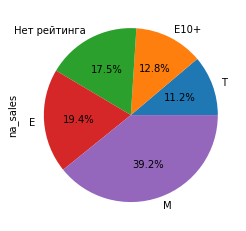

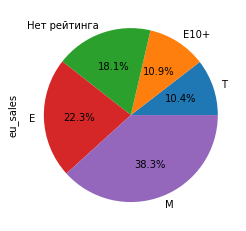

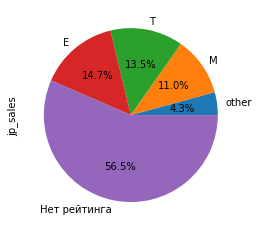

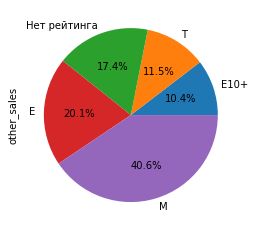

In [17]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for i in regions:
    data_esrm = data.pivot_table(index='rating', values=i, aggfunc=sum).sort_values(by=i)
    data_esrm['other'] = np.where(data_esrm[i] > 10, data_esrm.index, 'other')
    data_esrm.groupby('other')[i].sum().sort_values().plot(kind='pie', autopct='%1.1f%%')
    plt.show()
    

Самые популярные рейтинги в Северной Америке: М, Е
Самые популярные рейтинги в Европе: М, Е
Самые популярные рейтинги в Японии: Е, Т
Самые популярные рейтинги в других регионах: М, Е

Однако у достаточно большого количества игр отсутствует рейтинг: у 56,5% в Японии и примерно у 18% во всех остальных регионах.

### Вывод

1. Северная Америка
    * Самые популярные платформы: Х360, PS4, PS3
    * Самые популярные жанры: Action, Shooter, Sports
    * Cамый популярные ретинги:  М, Е
    
2. Европа
    * Самые популярные платформы в Европе: PS4, PS3, Х360
    * Самые популярные жанры в Европе: Action, Shooter, Sports
    * Cамый популярные ретинги:  М, Е
    
3. Япония
    * Самые популярные платформы в Японии: 3DS, PS3, PSV
    * Самые популярные жанры в Японии: Role-Playing, Action, Misc
    * Cамый популярные ретинги: Е, Т. Однако у 56,5% игр отсутствует рейтинг.
    
4. Другие регионы
    * Самые популярные платформы в других регионах: PS4, PS3, X360
    * Самые популярные жанры в других регионах: Action, Sports, Shooter
    * Cамый популярные ретинги:  М, Е

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [18]:
alpha = 0.01

data_xbox = data.query('platform == "XOne" and user_score > 0 and critic_score > 0')
data_pc = data.query('platform == "PC" and user_score > 0 and critic_score > 0')

hypothesis_platform = st.ttest_ind(data_xbox['user_score'], data_pc['user_score'])
mean_user_score_xbox = data_xbox['user_score'].mean()
mean_user_score_pc = data_pc['user_score'].mean()

print('Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые":') 
print('p-value: ', hypothesis_platform.pvalue)
print('Cредняя оценка пользователей по платформе XBox One:' ,mean_user_score_xbox)
print('Cредняя оценка пользователей по платформе PC:' ,mean_user_score_pc)

if hypothesis_platform.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')        

Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые":
p-value:  0.5991315923632393
Cредняя оценка пользователей по платформе XBox One: 6.538181818181818
Cредняя оценка пользователей по платформе PC: 6.4543147208121825
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, следовательно, средние пользовательские рейтинги платформ Xbox One и PC одинаковые

### Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

In [19]:
data_action = data.query('genre == "Action" and user_score > 0 and critic_score > 0')
data_sports = data.query('genre == "Sports" and user_score > 0 and critic_score > 0')

hypothesis_genre = st.ttest_ind(data_action['user_score'], data_sports['user_score'])
mean_user_score_action = data_action['user_score'].mean()
mean_user_score_sports = data_sports['user_score'].mean()

print('Гипотеза "Средние пользовательские рейтинги жанров Action и Sports одинаковые":') 
print('p-value: ', hypothesis_genre.pvalue)
print('Cредняя оценка пользователей по жанру Action:' ,mean_user_score_action)
print('Cредняя оценка пользователей по жанру Sports:' ,mean_user_score_sports)

if hypothesis_genre.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')        

Гипотеза "Средние пользовательские рейтинги жанров Action и Sports одинаковые":
p-value:  9.13633279873618e-16
Cредняя оценка пользователей по жанру Action: 6.899305555555555
Cредняя оценка пользователей по жанру Sports: 5.819858156028368
Отвергаем нулевую гипотезу


Проведу дополнительный односторонний тест.
Нулевая гипотеза: Cредняя оценка пользователей по жанру Action больше средней оценки пользователей по жанру Sports
Альтернаятивная гипотеза: Средняя оценка пользователей по жанру Action меньше средней оценки пользователей по жанру Sports

In [20]:
hypothesis_genre_mean = st.ttest_1samp(data_action['user_score'], mean_user_score_sports)

print('Гипотеза "Cредняя оценка пользователей по жанру Action больше средней оценки пользователей по жанру Sports":') 
print('p-value: ', hypothesis_genre_mean.pvalue / 2)
print('Cредняя оценка пользователей по жанру Action:' ,mean_user_score_action)
print('Cредняя оценка пользователей по жанру Sports:' ,mean_user_score_sports)

if (hypothesis_genre_mean.pvalue / 2 < alpha) and (data_action['user_score'].mean() < mean_user_score_sports):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')        

Гипотеза "Cредняя оценка пользователей по жанру Action больше средней оценки пользователей по жанру Sports":
p-value:  4.659138999740703e-50
Cредняя оценка пользователей по жанру Action: 6.899305555555555
Cредняя оценка пользователей по жанру Sports: 5.819858156028368
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, следовательно, средняя оценка пользователей по жанру Action больше средней оценки пользователей по жанру Sports

## Вывод

1. В среднем, платформы "живут" от 5 до 10 лет. Также выявила, что на 2006 - 2011 гг пришелся пик продаж игр, а с 2012 года ситуация на рынке стабилизировалась. Следовательно, для прогноза на 2017 годберем информацию с 2012 года.
2. Выявлено несколько перспективных платформ: PS4, 3DS, PC, XOne, PSV 
3. На платформах 3DS и PS4 выпускались самые популярные игры
4. Есть зависимость от оценки пользователей и критиков и продажи игр. Хорошие продажи начинаются от оценки пользователей: от 7; и от оценки критиков: от 80
5. Самый популярный жанр по общему количеству проданных копий - Action.
6. Самый популярный жанр по количеству проданных копий в расчете на единицу игры - Shooter.
7. Топ 3 по регионам:
- Северная Америка
    * Самые популярные платформы: Х360, PS4, PS3
    * Самые популярные жанры: Action, Shooter, Sports
    * Cамый популярные ретинги: М, Е   
- Европа
    * Самые популярные платформы в Европе: PS4, PS3, Х360
    * Самые популярные жанры в Европе: Action, Shooter, Sports
    * Cамый популярные ретинги: М, Е    
- Япония
    * Самые популярные платформы в Японии: 3DS, PS3, PSV
    * Самые популярные жанры в Японии: Role-Playing, Action, Misc
    * Cамый популярные ретинги: Е, Т. Однако у 56,5% игр отсутствует рейтинг    
- Другие регионы
    * Самые популярные платформы в других регионах: PS4, PS3, X360
    * Самые популярные жанры в других регионах: Action, Sports, Shooter
    * Cамый популярные ретинги: М, Е
    
    
Итог:
Популярные платформы во всех регионах: PS4, PS3, X360. Из этого списка перспективной является только PS4.   
Полулярный жанр во всех регионах: Action
Популярный рейтинг во всех регионах: E

